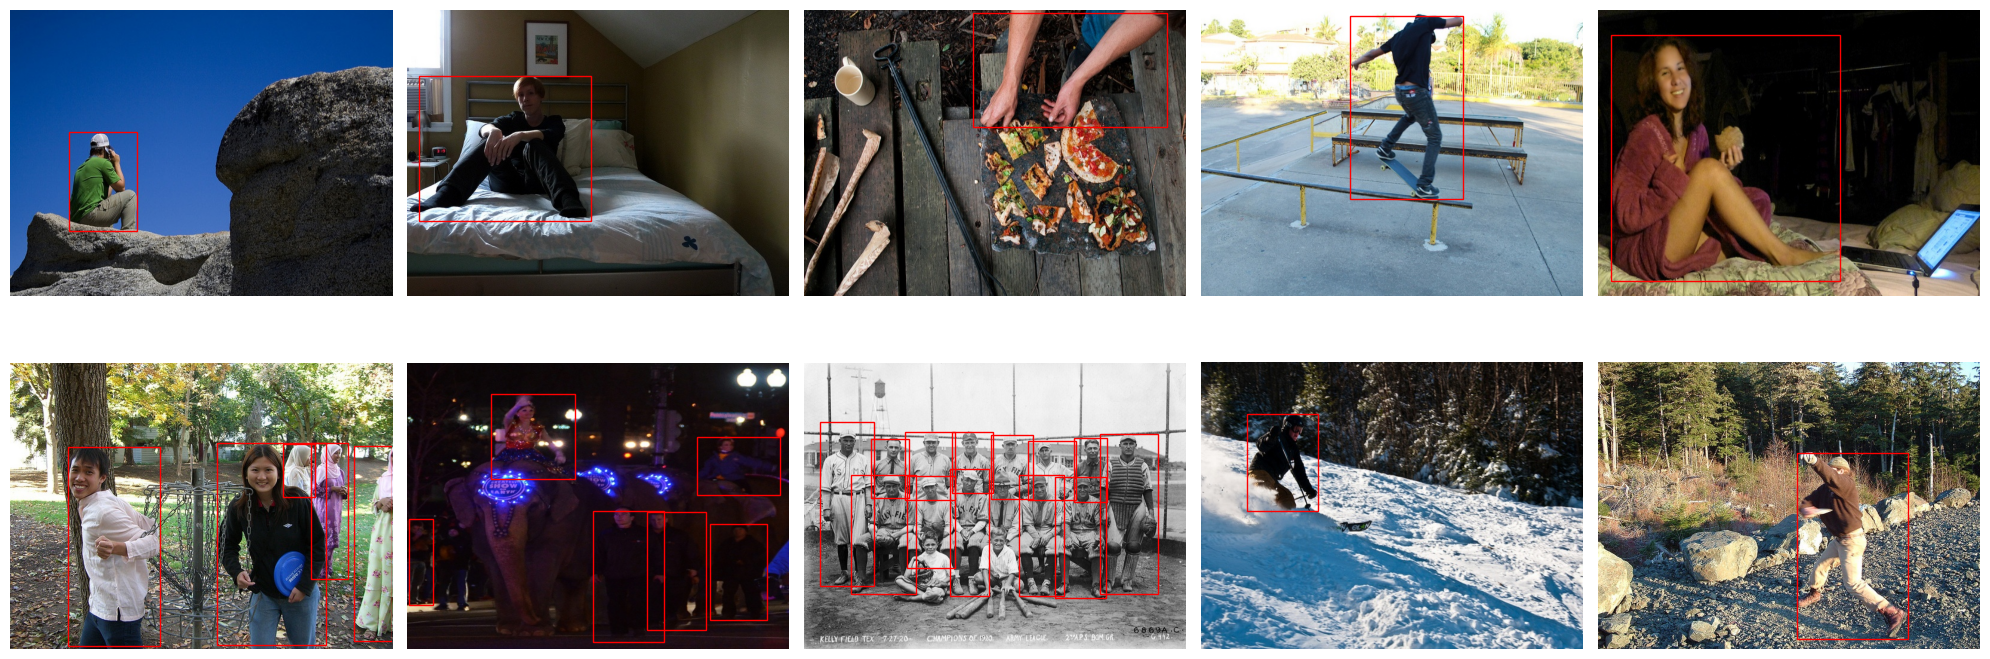

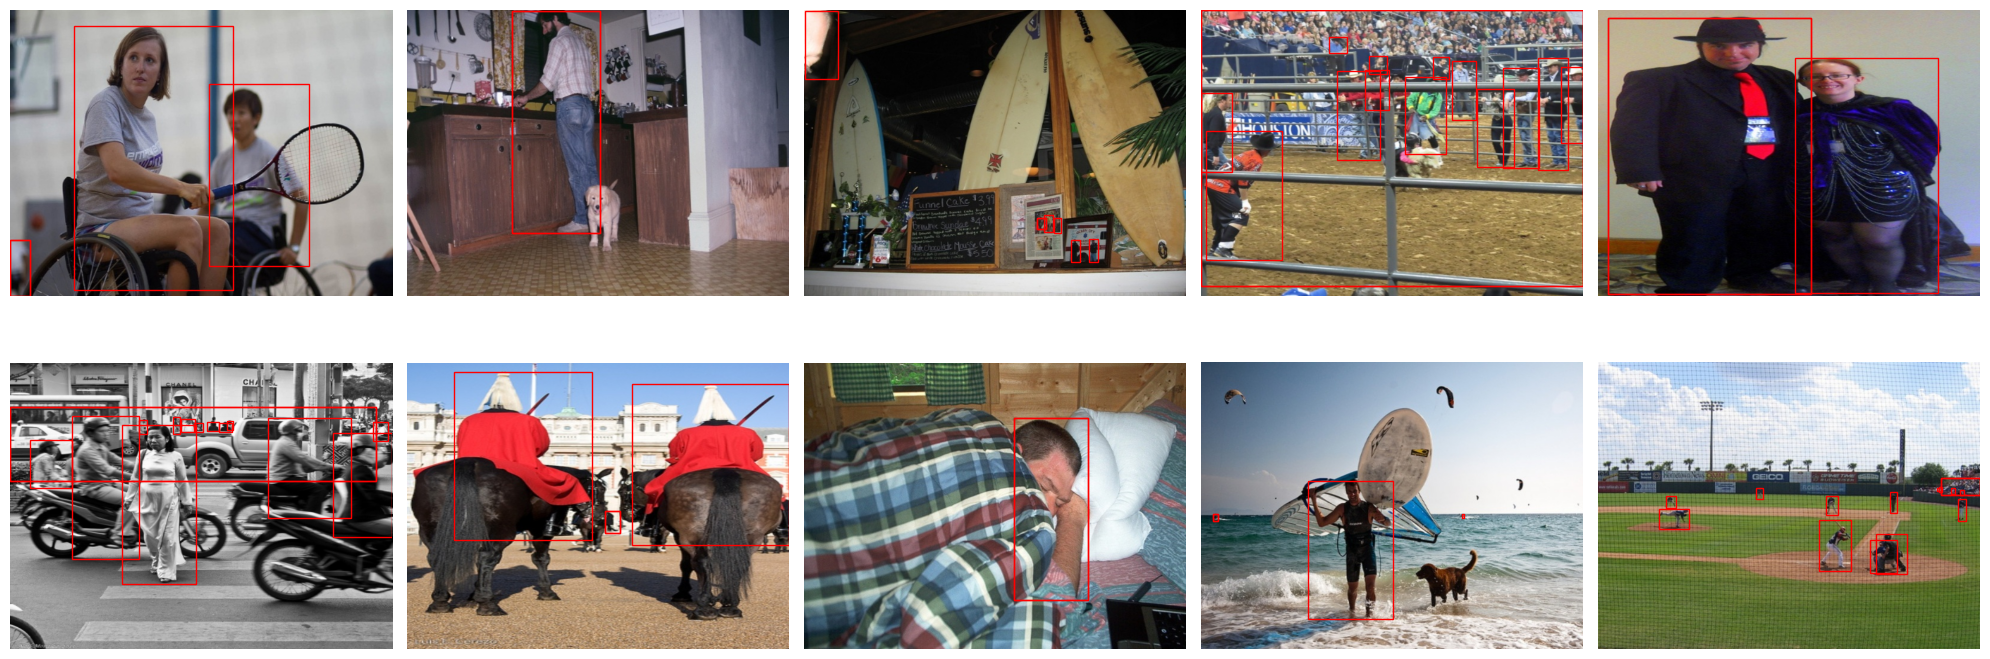

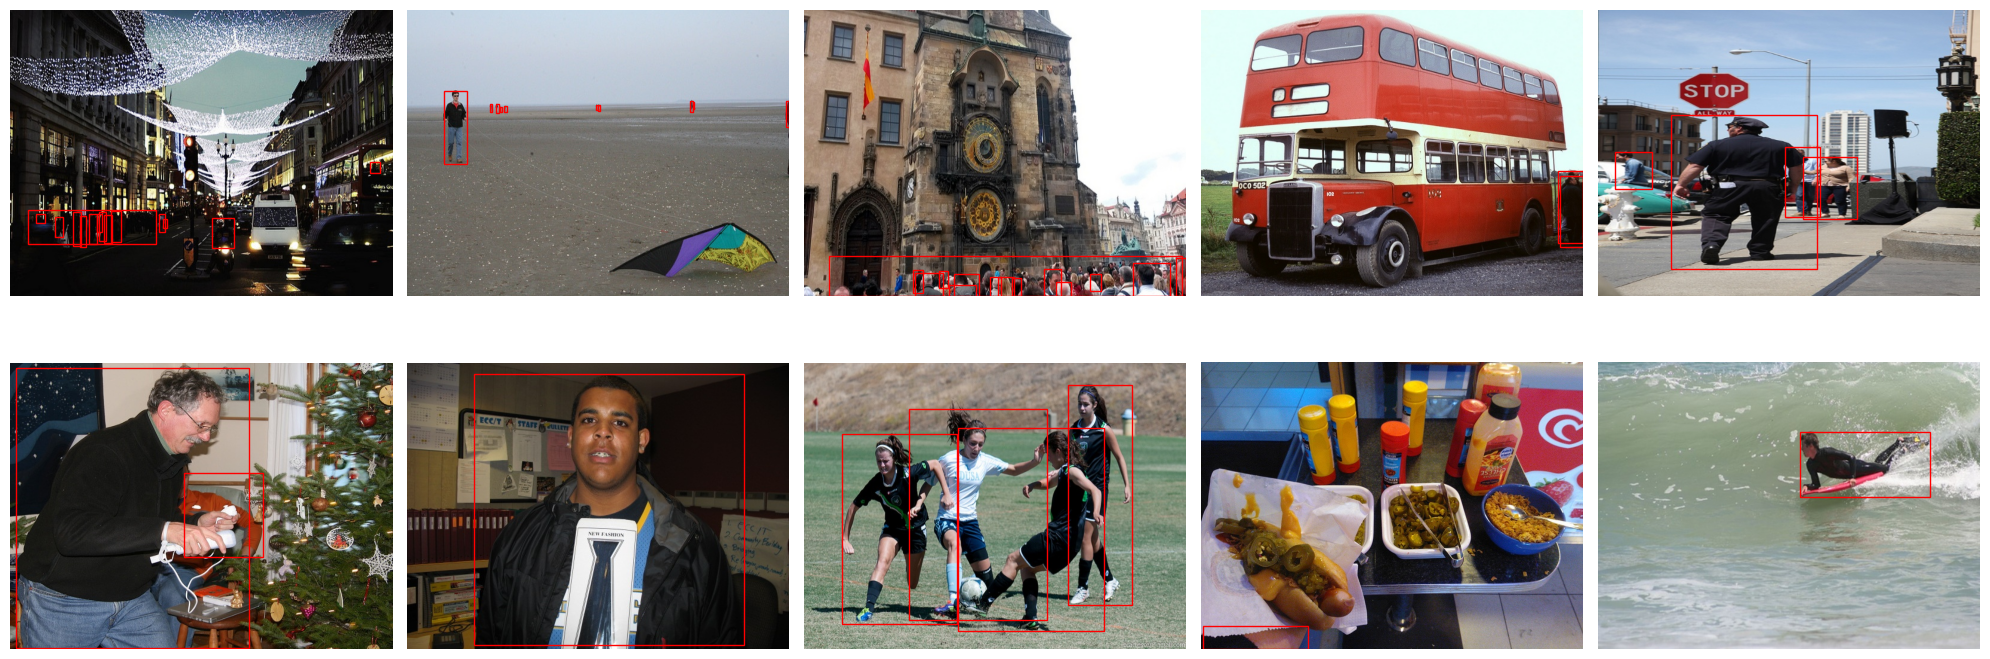

In [7]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Path to the datasets
dataset1_path = r"C:\Users\adith\Documents\computer vision\cocodataset\train"
dataset2_path = r"C:\Users\adith\Documents\computer vision\cocodataset\validation"
dataset3_path = r"C:\Users\adith\Documents\computer vision\cocop2\train"

# Number of images to select from each dataset
num_images = 10

# Function to load annotations from a YOLO format file
def load_annotations(file_path, image_width, image_height):
    annotations = []
    with open(file_path, "r") as f:
        lines = f.readlines()
        for line in lines:
            class_id, x_center, y_center, bbox_width, bbox_height = map(float, line.split())
            
            # Convert YOLO format to bounding box coordinates
            x = (x_center - bbox_width / 2) * image_width
            y = (y_center - bbox_height / 2) * image_height
            width = bbox_width * image_width
            height = bbox_height * image_height
            
            # Add the bounding box coordinates to the annotations
            annotations.append((x, y, width, height))
    
    return annotations

# Function to display images with annotations
def display_images_with_annotations(image_paths, annotations):
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    axes = axes.ravel()
    
    for i, (image_path, annotation) in enumerate(zip(image_paths, annotations)):
        # Load image
        image = Image.open(image_path)
        
        # Display image
        axes[i].imshow(image)
        
        # Display bounding boxes
        for bbox in annotation:
            x, y, width, height = bbox
            rect = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor='r', facecolor='none')
            axes[i].add_patch(rect)
        
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

image1_path = os.path.join(dataset1_path, 'images')
image2_path = os.path.join(dataset2_path, 'images')
image3_path = os.path.join(dataset3_path, "images")

# Randomly select images from each dataset
dataset1_images = random.sample(os.listdir(image1_path), num_images)
dataset2_images = random.sample(os.listdir(image2_path), num_images)
dataset3_images = random.sample(os.listdir(image3_path), num_images)

# Display images with annotations for dataset 1
dataset1_annotations = []
img1_path=[]

for image in dataset1_images:
    
    image_path=os.path.join(image1_path,image)
    annotation_path = os.path.join(dataset1_path, 'labels')
    annotation_path = os.path.join(annotation_path, image.replace(".jpg", ".txt"))
    # Load image dimensions for YOLO format conversion
    image_width, image_height = Image.open(image_path).size
    
    annotation = load_annotations(annotation_path, image_width, image_height)
    dataset1_annotations.append(annotation)
    img1_path.append(image_path)

display_images_with_annotations(img1_path, dataset1_annotations)

# Display images with annotations for dataset 2
dataset2_annotations = []
img2_path=[]
for image in dataset2_images:
    
    image_path=os.path.join(image2_path,image)
    annotation_path = os.path.join(dataset2_path, 'labels')
    annotation_path = os.path.join(annotation_path, image.replace(".jpg", ".txt"))
    # Load image dimensions for YOLO format conversion
    image_width, image_height = Image.open(image_path).size
    
    annotation = load_annotations(annotation_path, image_width, image_height)
    dataset2_annotations.append(annotation)
    img2_path.append(image_path)
display_images_with_annotations(img2_path, dataset2_annotations)

# Display images with annotations for dataset 3
dataset3_annotations = []
img3_path=[]
for image in dataset3_images:
    
    image_path=os.path.join(image3_path,image)
    annotation_path = os.path.join(dataset1_path, 'labels')
    annotation_path = os.path.join(annotation_path, image.replace(".jpg", ".txt"))
    
    # Load image dimensions for YOLO format conversion
    image_width, image_height = Image.open(image_path).size
    
    annotation = load_annotations(annotation_path, image_width, image_height)
    dataset3_annotations.append(annotation)
    img3_path.append(image_path)
display_images_with_annotations(img3_path, dataset3_annotations)
